## Build a classification model using telecom dataset

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
churn_df = pd.read_csv('telecom_churn_clean.csv', index_col=0)

In [4]:
churn_df.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [5]:
# import KneighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the target variable
x = churn_df[["account_length", "customer_service_calls"]].values
y = churn_df["churn"].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifiers to the data
knn.fit(x, y)

KNeighborsClassifier(n_neighbors=6)

In [6]:
# New data points
x_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

In [7]:
# Predict the labels for the x_new
y_pred = knn.predict(x_new)

# Print the predictions for x_new
print("Predictions: {}".format(y_pred))

Predictions: [0 1 0]


Great work! The model has predicted the first and third customers will not churn in the new array. But how do we know how accurate these predictions are? Let's explore how to measure a model's performance
### Measuring model performance

Train/test split + computing accuracy

In [8]:
# import module
from sklearn.model_selection import train_test_split

x = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Spltting into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(x_train, y_train)

# Print the accuracy
print(knn.score(x_test, y_test))

0.8740629685157422


Overfitting and underfitting

Our aim is to produce a model that can interprete the relationship between features and the target variable, as well as generalized well when exposed to new observations.

In [9]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
    
    # Set up a KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    
    # Fit the model
    knn.fit(x_train, y_train)
    
    # Compute accuracy
    train_accuracies[neighbor] = knn.score(x_train, y_train)
    test_accuracies[neighbor] = knn.score(x_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.9036009002250562, 3: 0.9114778694673669, 4: 0.8945986496624156, 5: 0.8953488372093024, 6: 0.8893473368342085, 7: 0.8885971492873218, 8: 0.8863465866466617, 9: 0.8870967741935484, 10: 0.8840960240060015, 11: 0.8874718679669917, 12: 0.8837209302325582} 
 {1: 0.7946026986506747, 2: 0.8605697151424287, 3: 0.8500749625187406, 4: 0.8695652173913043, 5: 0.8740629685157422, 6: 0.8650674662668666, 7: 0.8710644677661169, 8: 0.863568215892054, 9: 0.8725637181409296, 10: 0.8665667166416792, 11: 0.8710644677661169, 12: 0.8710644677661169}


Visualizing model complexity

Creating a model complexity curve to visualize how performance changes as the model becomes less complex.

In [10]:
import matplotlib.pyplot as plt

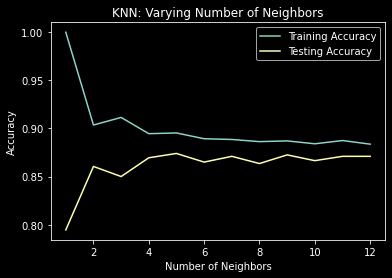

In [11]:
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display plot
plt.show()

Great work! See how training accuracy decreases and test accuracy increases as the number of neighbors gets larger. For the test set, accuracy peaks with 7 neighbors, suggesting it is the optimal value for our model. Now let's explore regression models!

### Fine-Tuning Your Model


In [20]:
# Loading data
diabetes_df = pd.read_csv('diabetes_clean.csv').drop(["pregnancies", "glucose", "diastolic", "triceps", "insulin", "dpf"], axis=1)

# Creating array of values
x = diabetes_df.drop("diabetes", axis=1).values
y = diabetes_df['diabetes'].values

# Splitting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=42)

knn = KNeighborsClassifier(n_neighbors=6)

# Import confusion matrix


array([[23.9, 22. ],
       [36.9, 28. ],
       [42.3, 24. ],
       ...,
       [45.6, 38. ],
       [42.4, 29. ],
       [22.5, 21. ]])